# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [49]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [51]:
# Создаём новые группировки возрастов для агрегации
df['age_group_1'] = ['<20' if x<20 else '[20-60)' if 20<=x<60 else '[>=60' for x in df['age']]
df['age_group_2'] = ['<20)' if x<20 else '[20-30)' if 20<=x<30 else '[30-40)' if 30<=x<40 else '[40-50)' if 40<=x<50 else '[50-60)' if 50<=x<60 else '[60-70)' if 60<=x<70 else '[>=70' for x in df['age']]

In [93]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,age_group_1,age_group_2
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,[>=60,[>=70
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952,[20-60),[40-50)
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539,[20-60),[50-60)
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556,[20-60),[40-50)
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562,[>=60,[>=70


In [52]:
df_city_type = df.groupby(['city_type'])['age'].count().reset_index()
sort = [2,4,3,1,5]
df_city_type['sort'] = sort
df_city_type = df_city_type.sort_values(by='sort')
df_city_type = df_city_type.set_index('city_type')['age']
df_gender = df.groupby(['city_type','gender'])['age'].count().reset_index()
sort = [2,2,4,4,3,3,1,1,5,5]
df_gender['sort'] = sort
df_gender = df_gender.sort_values(by='sort')
df_gender = df_gender.set_index('city_type')[['gender','age']]
df_gender = df_gender.reset_index()
# df_age_group_2 = df.groupby(['age_group_2'])['age'].count().reset_index()
# df_age_group_1 = df.groupby(['age_group_1'])['age'].count().reset_index()

In [53]:
df_gender

,city_type,gender,age
0,<100,F,7048
1,<100,М,8163
2,100-500,F,5291
3,100-500,М,5369
4,500-1000,F,3297
5,500-1000,М,3629
6,1M+,F,4063
7,1M+,М,3784
8,Mega,F,4175
9,Mega,М,4458


In [89]:
# Доходы банка
df_nbi_gender = df.groupby(['gender'])['nbi'].sum().reset_index()
df_nbi_gender # абсолютная сумма доходов банка от женщин и мужчин

,gender,nbi
0,F,2.299372e+08
1,М,3.357234e+08


In [102]:
# У мужчин в среднем в 2 раза больше средств на счёте, чем у женщин.
df_avg_casa_gender = df.groupby(['gender'])['avg_casa_balance_1Y'].sum().reset_index()
df_avg_casa_gender # абсолютная сумма доходов банка от женщин и мужчин

,gender,avg_casa_balance_1Y
0,F,1.021730e+09
1,М,2.153619e+09


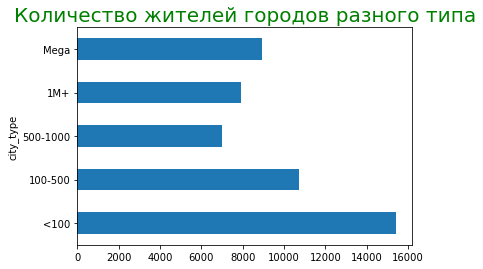

In [66]:
df_city_type.plot(kind='barh')
plt.title('Количество жителей городов разного типа', size=20, color='g')
plt.show()

In [55]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

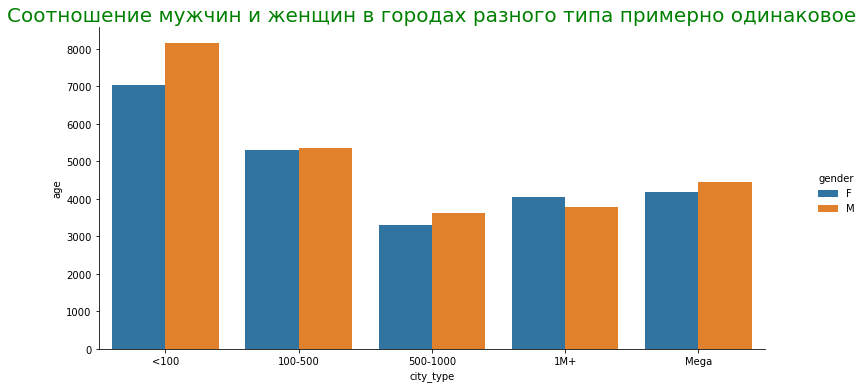

In [65]:
sns.catplot(x='city_type',
            y='age',
            hue = 'gender',
            hue_order=['F','М'],
            kind="bar",
            aspect=2,
            data=df_gender);
plt.title('Соотношение мужчин и женщин в городах разного типа примерно одинаковое', size=20, color='g');

In [100]:
# Добавляем интерактивность
# Тут можно детально посмотреть на каждый параметр с разбивкой на группы городов и возрастов.
def box_plotter(df, group):
    term = df['city_type'] == group
    sns.catplot(x='age_group_2', 
            y='avg_casa_balance_1Y', 
            aspect=2,
            kind="box", 
            showfliers=False,
            data=df[term].sort_values(by='age'));
    plt.title('Остаток средств на счёте', size=20, color='g');

def f(group):
    ''' Запускаем боксплот '''
    box_plotter(df,group)

In [101]:
# Запускаем 
interact(f, group=df['city_type'].unique());

interactive(children=(Dropdown(description='group', options=('<100', 'Mega', '100-500', '1M+', '500-1000'), va…

(-0.5, 2.0, 0.0, 50000.0)

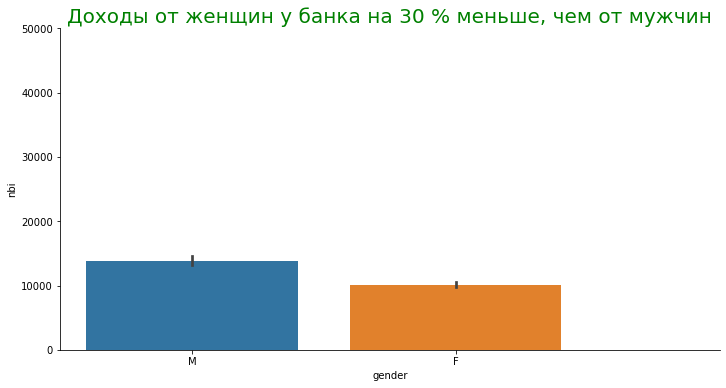

In [95]:
sns.catplot(x="gender",
            y='nbi',
            kind="bar",
            aspect=2,
            data=df)
# "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count".
plt.title('Доходы от женщин у банка на 30 % меньше, чем от мужчин', size=20, color='g');
plt.axis([-0.5,2,0,50000])

(-0.5, 7.0, 0.0, 50000.0)

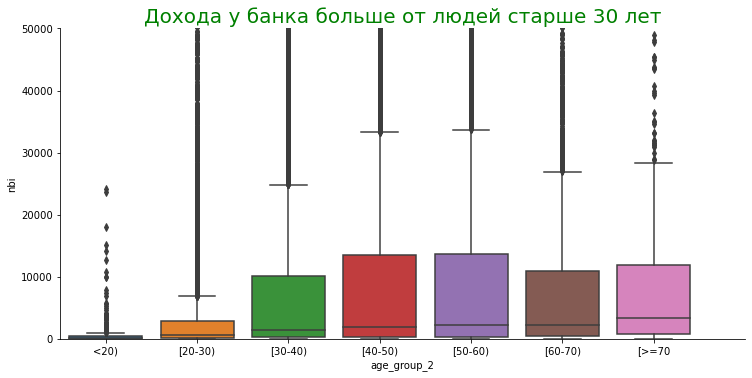

In [131]:
sns.catplot(x="age_group_2",
            y='nbi',
            kind="box",
            aspect=2,
            data=df.sort_values(by='age'))
# "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count".
plt.title('Дохода у банка больше от людей старше 30 лет', size=20, color='g');
plt.axis([-0.5,7,0,50000])

In [ ]:
df[df['city_type'].isin(['Mega'])]

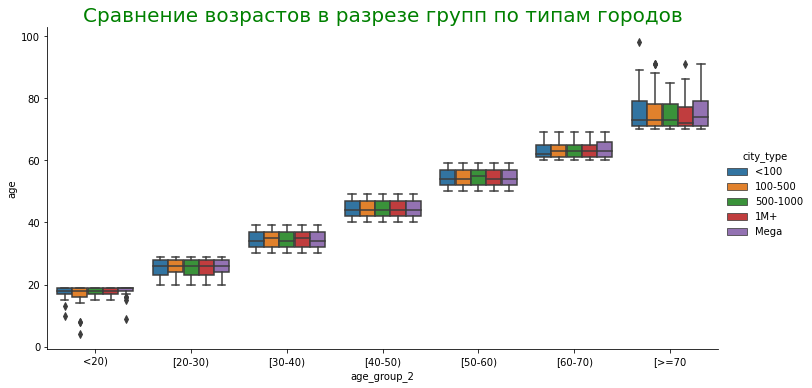

In [79]:
sns.catplot(x='age_group_2',
            y='age',
            hue = 'city_type',
            hue_order=['<100','100-500','500-1000','1M+','Mega'],
            kind="box",
            aspect=2,
            data=df.sort_values(by='age'));
plt.title('Сравнение возрастов в разрезе групп по типам городов', size=20, color='g');

In [67]:
corr = df.corr()
corr

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
age,1.000000,0.278095,0.005730,0.003346,0.010135,0.049813,0.026663,-0.117706,0.030522,0.009509,...,0.012036,0.011414,0.017393,0.006262,0.004197,0.011367,-0.041340,0.103702,0.000874,0.061660
full_mob,0.278095,1.000000,0.066694,0.095045,0.130913,0.013962,0.011671,0.067083,0.114933,0.010622,...,0.129737,0.138456,0.147058,0.096175,0.100781,0.112798,0.032183,0.032694,-0.005283,0.110472
ml_balance,0.005730,0.066694,1.000000,0.001244,0.658112,-0.002642,-0.001646,-0.020220,-0.009454,0.000373,...,0.681781,0.637054,0.711416,0.000881,0.000842,0.001720,0.389744,0.005684,-0.000557,0.092858
cl_balance_0m,0.003346,0.095045,0.001244,1.000000,0.733257,-0.011878,-0.005663,0.078812,0.086093,0.028787,...,0.686226,0.721025,0.591382,0.960047,0.985302,0.901052,0.185143,0.036264,-0.002494,0.378223
loan_balance_0m,0.010135,0.130913,0.658112,0.733257,1.000000,-0.011178,-0.005749,0.046519,0.069562,0.022902,...,0.979519,0.977384,0.932125,0.705331,0.722479,0.664858,0.425271,0.041081,0.001041,0.369049
td_balance_0m,0.049813,0.013962,-0.002642,-0.011878,-0.011178,1.000000,0.664375,-0.002052,0.080094,0.002913,...,-0.010844,-0.011568,-0.011226,-0.011730,-0.012242,-0.012762,-0.010313,0.046300,0.000233,0.574840
casa_balance_0m,0.026663,0.011671,-0.001646,-0.005663,-0.005749,0.664375,1.000000,0.029812,0.181762,0.008150,...,-0.006160,-0.005972,-0.006484,-0.006419,-0.005950,-0.007107,-0.004515,0.054488,-0.000507,0.769899
dc_trx_cnt,-0.117706,0.067083,-0.020220,0.078812,0.046519,-0.002052,0.029812,1.000000,0.477753,0.038176,...,0.039649,0.048097,0.028076,0.073563,0.079771,0.064011,-0.012612,-0.147866,-0.008283,0.057233
dc_trx_sum,0.030522,0.114933,-0.009454,0.086093,0.069562,0.080094,0.181762,0.477753,1.000000,0.057170,...,0.062380,0.073891,0.053536,0.081869,0.086958,0.072060,-0.007856,0.158789,-0.003323,0.263218
income,0.009509,0.010622,0.000373,0.028787,0.022902,0.002913,0.008150,0.038176,0.057170,1.000000,...,0.021994,0.025484,0.024948,0.028589,0.031257,0.034759,0.055666,0.054947,-0.004796,0.026677


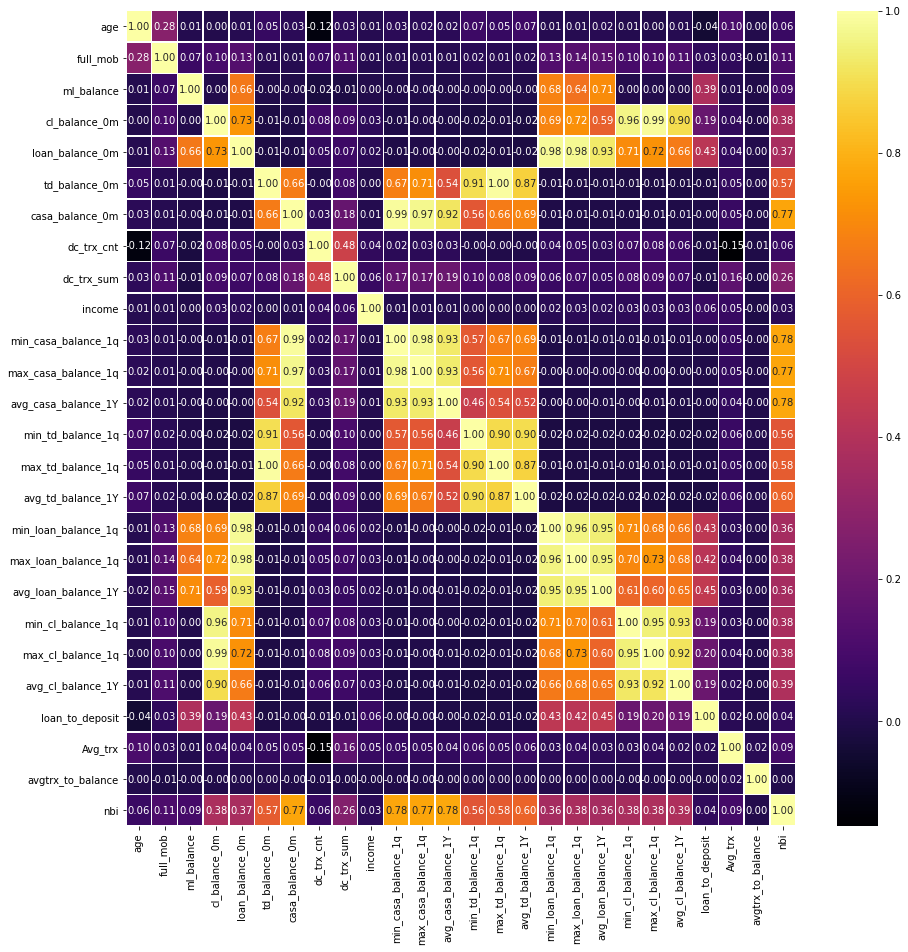

In [75]:
# Матрица корреляции всех показателей
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno")
plt.show();

Видно, что есть сильная связь доходов банка от: 
 - суммы средств на счету клиента (casa_balance_0m)
 - суммы депозитов (td_balance_0m)
Связи между количеством средств на счёте клиента и объёмом выданных кредитов нет.
По размеру транзакции тоже ничего явного сказать сразу не получится, т.к. сильной связи ни с одним из остальных показателей нет.

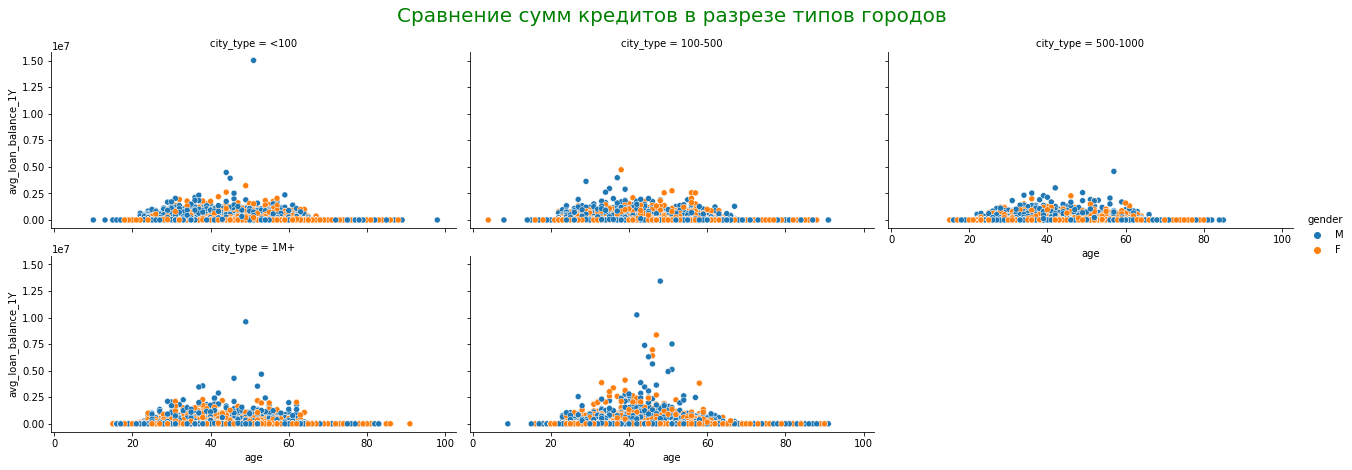

In [114]:
sns.relplot(
    x='age',
    y='avg_loan_balance_1Y',
    hue='gender',
    col='city_type',
    col_wrap=3,
    col_order=['<100','100-500','500-1000','1M+','Mega'],
    data=df,
    aspect=2,
    height=3
);
plt.title('Сравнение баланса кредитов в разрезе типов городов', y=2.3, loc= 'center', size=20, color='g');

Баланс кредитов больше в крупных городах. В основном баланс составляет до 2.5 млн. руб.

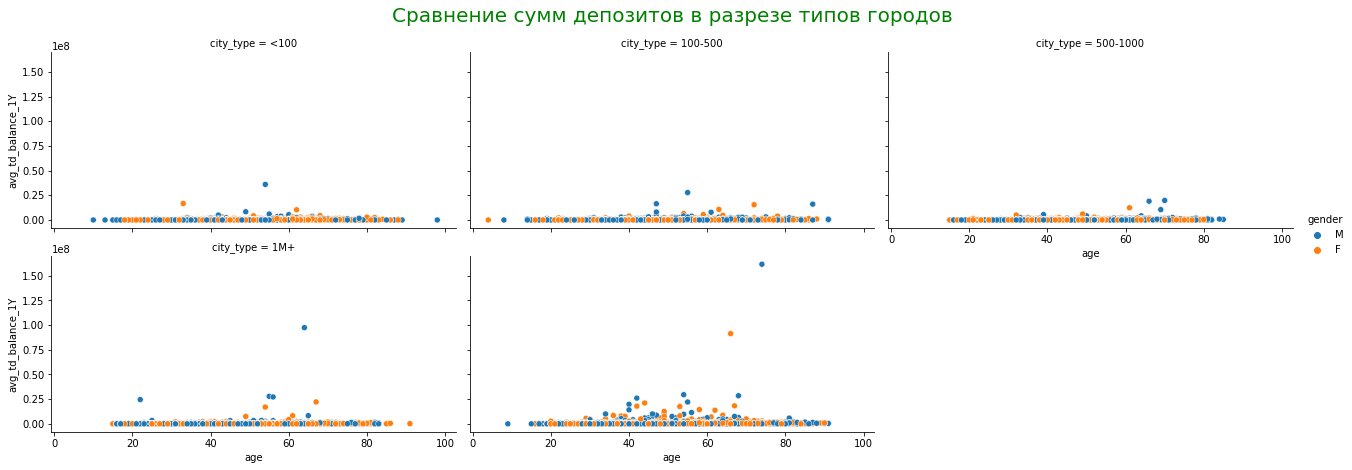

In [115]:
sns.relplot(
    x='age',
    y='avg_td_balance_1Y',
    hue='gender',
    col='city_type',
    col_wrap=3,
    col_order=['<100','100-500','500-1000','1M+','Mega'],
    data=df,
    height=3,
    aspect=2
);
plt.title('Сравнение балансов депозитов в разрезе типов городов', y=2.3, loc= 'center', size=20, color='g');

Вклады на существенные суммы (млн. и более) чаще открывают в больших городах. В основном суммы небольшие.

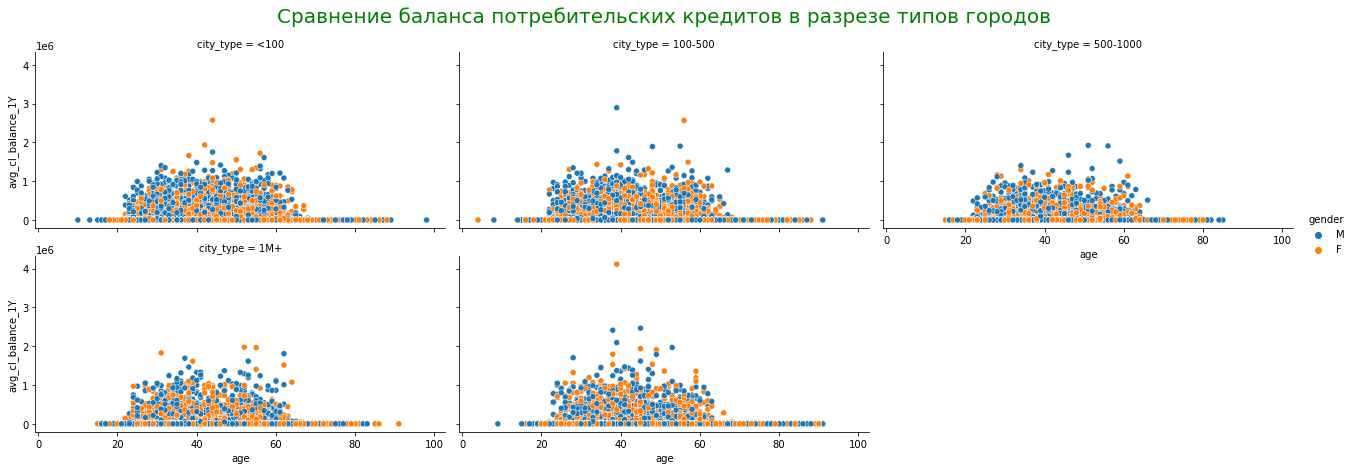

In [127]:
sns.relplot(
    x='age',
    y='avg_cl_balance_1Y',
    hue='gender',
    col='city_type',
    col_wrap=3,
    col_order=['<100','100-500','500-1000','1M+','Mega'],
    data=df,
    aspect=2,
    height=3
);
plt.title('Сравнение баланса потребительских кредитов в разрезе типов городов', y=2.3, loc= 'center', size=20, color='g');
# scatter`` and ``line

(-0.5, 5.0, 0.0, 1000000.0)

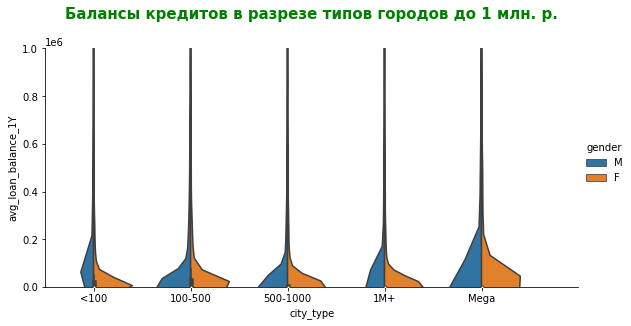

In [125]:
sns.catplot(
    x='city_type', 
    y='avg_loan_balance_1Y', 
    data=df, 
    kind='violin', 
    order=['<100','100-500','500-1000','1M+','Mega'], 
    hue='gender', 
#     hue_order=["F", "М"], 
    split=True, 
    height=4, 
    aspect=2)
plt.title('Балансы кредитов в разрезе типов городов до 1 млн. р.',y=1.1, size=15, color='g', weight='bold');
plt.axis([-0.5,5,0,1000000])

Кредитный баланс чаще всего составляет сумму до 100 т.р. Женщины в среднем имеют больше таких кредитных балансов.

(-0.5, 5.0, 0.0, 1000000.0)

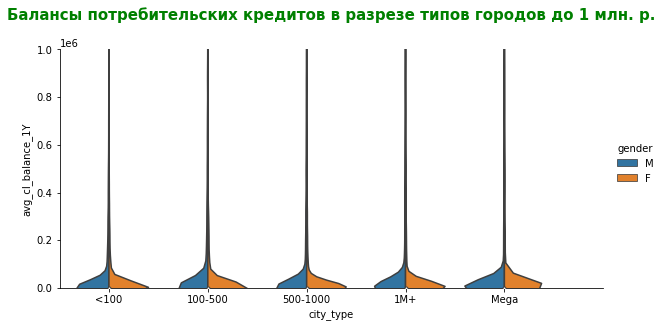

In [126]:
sns.catplot(
    x='city_type', 
    y='avg_cl_balance_1Y', 
    data=df, 
    kind='violin', 
    order=['<100','100-500','500-1000','1M+','Mega'], 
    hue='gender', 
#     hue_order=["F", "М"], 
    split=True, 
    height=4, 
    aspect=2)
plt.title('Балансы потребительских кредитов в разрезе типов городов до 1 млн. р.',y=1.1, size=15, color='g', weight='bold');
plt.axis([-0.5,5,0,1000000])

Балансов потребительских кредитов больше на меньшие суммы (до 100 т.р.)

Другие виды графиков (много строк и столбцов):

In [ ]:
sns.relplot(
    x='Period',
    y='Smoothies',
    col='daywk',
    col_order=day_order,
    row='Promotion',
    row_order=['Yes', 'No'],
    data=snacks_sales,
    height=3);

In [ ]:
g = sns.relplot(
    x='age', 
    y='avg_loan_balance_1Y', 
    data=df, 
    kind='line', 
    hue='Item', 
    row='gender', 
    col='city_type')

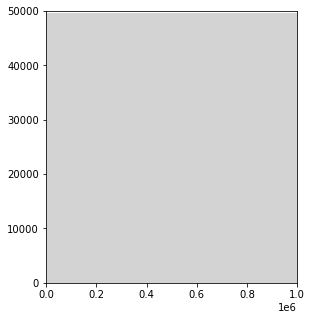

In [130]:
from pylab import rcParams
rcParams['figure.figsize']= 4.5,5
plt.hist(df['avg_loan_balance_1Y'], ec='white', color='lightgrey')
plt.axis([-0.5,1000000,0,50000])
plt.show()